In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np


In [91]:
# to get data
base_folder_path = r'C:\Users\snehalpimple\Documents\Personal\Project\Eluvio'
train_path = os.path.join(base_folder_path, 'dataset_car_logo\Train')
print(train_path)
test_path = os.path.join(base_folder_path, 'dataset_car_logo\Test')
print(test_path)

C:\Users\ksankhe\OneDrive - Qualcomm\Documents\Personal\SnehalProject\Job\Eluvio\dataset_car_logo\Train
C:\Users\ksankhe\OneDrive - Qualcomm\Documents\Personal\SnehalProject\Job\Eluvio\dataset_car_logo\Test


In [92]:
class_names = os.listdir(train_path)
print(class_names)

print('Count of Train Images:')
for i in class_names:
    print(i +' Train'+ ':' + str(len(os.listdir(os.path.join(train_path, i)))))

    
print('Count of Test Images:')
for i in class_names:
    print(i +' Test'+ ':' + str(len(os.listdir(os.path.join(test_path, i)))))

['Acura', 'Audi', 'BMW', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'KIA', 'Lamborghini', 'Lexus', 'Mazda', 'MercedesBenz', 'Nissan', 'Porsche', 'Tesla', 'Toyota', 'Volkswagen']
Count of Train Images:
Acura Train:50
Audi Train:50
BMW Train:50
Chevrolet Train:50
Ford Train:50
Honda Train:50
Hyundai Train:50
Infiniti Train:50
KIA Train:48
Lamborghini Train:50
Lexus Train:50
Mazda Train:50
MercedesBenz Train:50
Nissan Train:49
Porsche Train:50
Tesla Train:50
Toyota Train:50
Volkswagen Train:50
Count of Test Images:
Acura Test:6
Audi Test:5
BMW Test:6
Chevrolet Test:5
Ford Test:6
Honda Test:7
Hyundai Test:7
Infiniti Test:5
KIA Test:5
Lamborghini Test:5
Lexus Test:5
Mazda Test:7
MercedesBenz Test:5
Nissan Test:5
Porsche Test:5
Tesla Test:6
Toyota Test:9
Volkswagen Test:6


In [72]:
# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# print(train_path)
# img = load_img(train_path+'\\Acura\\0.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir=base_folder_path + '\\dataset_car_logo\\Preview', save_prefix='cat', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [93]:
batch_size = 32
img_size = 150

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255, rotation_range=30,
         zoom_range=0.2,
         width_shift_range=0.2,
         height_shift_range=0.2)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255) #,
#         shear_range=0.2,
#         zoom_range=0.2,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        train_path,  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')

Found 897 images belonging to 18 classes.
Found 105 images belonging to 18 classes.


In [94]:
model = Sequential()
model.add(Conv2D(32, (3,3),padding="same", activation="relu", input_shape=(img_size,img_size,3), data_format='channels_last'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(len(class_names), activation="softmax"))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 37, 37, 64)      

In [95]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
history = model.fit(train_generator, steps_per_epoch=900//batch_size, epochs = 100 , validation_data = validation_generator, validation_steps=105//batch_size)

Epoch 1/100
28/28 [==============================] - 22s 758ms/step - loss: 2.9426 - accuracy: 0.0575 - val_loss: 2.8880 - val_accuracy: 0.0729
Epoch 2/100
28/28 [==============================] - 25s 883ms/step - loss: 2.9014 - accuracy: 0.0620 - val_loss: 2.8869 - val_accuracy: 0.0521
Epoch 3/100
28/28 [==============================] - 24s 844ms/step - loss: 2.8949 - accuracy: 0.0640 - val_loss: 2.8890 - val_accuracy: 0.0625
Epoch 4/100
28/28 [==============================] - 25s 876ms/step - loss: 2.8879 - accuracy: 0.0732 - val_loss: 2.8890 - val_accuracy: 0.0521
Epoch 5/100
28/28 [==============================] - 23s 824ms/step - loss: 2.8964 - accuracy: 0.0702 - val_loss: 2.8866 - val_accuracy: 0.0833
Epoch 6/100
28/28 [==============================] - 24s 859ms/step - loss: 2.8811 - accuracy: 0.0679 - val_loss: 2.8880 - val_accuracy: 0.0938
Epoch 7/100
28/28 [==============================] - 24s 850ms/step - loss: 2.8844 - accuracy: 0.0592 - val_loss: 2.8912 - val_accuracy:

Epoch 58/100
28/28 [==============================] - 23s 814ms/step - loss: 2.1593 - accuracy: 0.2895 - val_loss: 2.7703 - val_accuracy: 0.1979
Epoch 59/100
28/28 [==============================] - 23s 834ms/step - loss: 2.1874 - accuracy: 0.2994 - val_loss: 2.7675 - val_accuracy: 0.1979
Epoch 60/100
28/28 [==============================] - 23s 820ms/step - loss: 2.1038 - accuracy: 0.3222 - val_loss: 2.8713 - val_accuracy: 0.1875
Epoch 61/100
28/28 [==============================] - 25s 885ms/step - loss: 2.1544 - accuracy: 0.3117 - val_loss: 2.8549 - val_accuracy: 0.1875
Epoch 62/100
28/28 [==============================] - 24s 847ms/step - loss: 2.1241 - accuracy: 0.3350 - val_loss: 2.8041 - val_accuracy: 0.2083
Epoch 63/100
28/28 [==============================] - 24s 842ms/step - loss: 2.1670 - accuracy: 0.3205 - val_loss: 2.8157 - val_accuracy: 0.1875
Epoch 64/100
28/28 [==============================] - 24s 841ms/step - loss: 2.1756 - accuracy: 0.3098 - val_loss: 2.7758 - val_ac

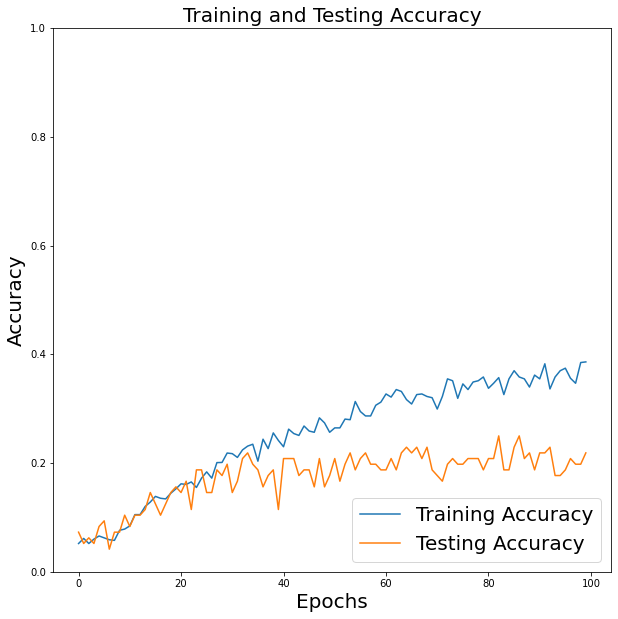

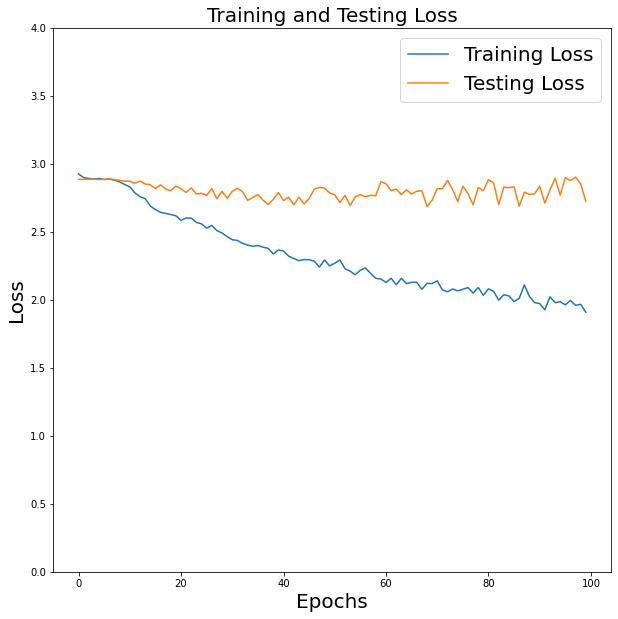

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 10))
#plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right', prop={"size":20})
plt.xlabel('Epochs', size = 20)
plt.ylabel('Accuracy', size = 20)
plt.title('Training and Testing Accuracy', fontsize=20)
plt.savefig('accuracy_augment.png')

#plt.subplot(2, 2, 2)
plt.figure(figsize=(10, 10))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.ylim(0.0, 4.0)
plt.legend(loc='upper right',  prop={"size":20})
plt.xlabel('Epochs', size = 20)
plt.ylabel('Loss', size = 20)
plt.title('Training and Testing Loss', fontsize=20)
plt.savefig('loss_augment.png')

plt.show()